In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
from scipy import linalg

In [73]:
idx2ICD = {}
with open('fid2.dict', "r") as f:
    for l in f:
        curr_icd =  l.split()
        idx2ICD[int(curr_icd[-1])] = " ".join(curr_icd[:-1])

In [5]:
#Values for 10 iterations with all patients
pi = np.array([0.32957649,  0.22506838,  0.00467266,  0.44068246])
Q = np.array([[-0.55679538, 0.55679538, 0.,         0.], 
             [ 0.,         -0.04629883, 0.04629883, 0.], 
             [ 0.,          0.,        -0.31540082, 0.31540082], 
             [ 0.,          0.,         0.,         0.]])
B0 = np.array([[ 0.08505136, 0.39485054, 0.38250632, 0.79584785],
             [ 0.00991206, 0.42293669, 0.5122748,  0.61483776],
             [ 0.54220268, 0.58136556, 0.69873758, 0.81729476],
             [ 0.13688719, 0.78541095, 0.83998778, 0.93223526]])
B = np.array([[ 0.58367351, 0.36526974, 0.41580183, 0.69242538],
             [ 0.18444552, 0.16101714, 0.26388643, 0.06328701],
             [ 0.4805553,  0.2811288,  0.93104982, 0.35246204],
             [ 0.0754658,  0.17767506, 0.2832236,  0.80521054]])
Z = np.array([[  1.26452917e-04, 1.38661215e-39, 5.99899736e-07, 1.32092466e-02, 
            2.38166480e-04, 8.66468418e-44, 7.27646197e-08, 5.12073126e-01, 
            2.77503570e-04, 7.53259383e-02, 3.03664976e-03, 6.13825660e-02, 
            1.20947041e-01, 8.38621404e-02, 2.20846625e-02, 2.43061069e-02, 
            8.02838109e-02, 8.43039962e-05, 1.25612346e-02, 7.61862444e-03, 
            1.43524372e-09, 4.27895528e-02, 2.02394571e-01, 1.43001369e-02, 
            4.15664422e-02, 6.05489681e-03, 1.95748957e-01, 4.75235184e-02, 
            7.45450128e-06, 1.43507779e-04, 7.05108067e-02, 2.09988053e-04, 
            8.46758801e-02, 1.15216004e-06, 4.92422763e-27, 1.88270052e-02, 
            1.83195820e-03, 9.91409526e-03, 3.50318134e-02, 4.30781389e-02, 
            1.54308608e-08, 2.52159653e-05, 3.91206036e-02, 1.35894225e-02],
         [  4.78941221e-02, 1.63815394e-08, 1.30840902e-01, 8.78197939e-04, 
             5.95857458e-06, 1.15047266e-01, 1.58790608e-01, 1.18107249e-15, 
             1.69520771e-01, 4.01146833e-03, 1.11865465e-01, 9.85504738e-02, 
             7.06798521e-02, 5.13252391e-02, 1.18989918e-03, 7.62183839e-02, 
             1.43197799e-01, 1.80822512e-01, 1.39669833e-03, 5.62314083e-02, 
             1.24341711e-01, 1.03506940e-03, 4.40295392e-10, 2.09338319e-01, 
             1.46959428e-01, 6.52067194e-06, 6.82482593e-12, 1.98580893e-01, 
             8.32053326e-03, 6.76081479e-02, 4.20906076e-08, 7.75804216e-02, 
             1.09751529e-02, 1.59180194e-12, 2.82920925e-02, 1.60642199e-02, 
             8.87022620e-02, 2.79170168e-10, 5.87613127e-02, 2.34416545e-07, 
             1.39080217e-05, 6.90886246e-03, 2.19266811e-04, 1.07893956e-03],
         [  2.90330873e-10, 2.35191862e-31, 6.65992029e-09, 4.14587324e-01, 
             5.77670925e-02, 2.03723551e-08, 6.45697351e-06, 6.03858624e-03, 
             1.41630699e-02, 1.53815698e-07, 2.23885666e-06, 9.89595059e-02, 
             4.13503264e-15, 3.52053861e-03, 1.26609697e-01, 9.45634444e-03, 
             3.05489777e-04, 3.80064540e-07, 9.30860973e-05, 3.60235639e-02, 
             8.11563790e-05, 6.47692792e-02, 2.00296296e-08, 4.66635558e-14, 
             2.50948294e-04, 1.33438726e-01, 1.80437778e-05, 6.33896141e-03, 
             1.72830831e-06, 1.87161561e-03, 9.21802673e-08, 4.01681935e-02, 
             1.48858678e-05, 4.58561178e-02, 2.22376837e-02, 2.50236744e-08, 
             1.56064516e-05, 4.01184866e-06, 5.44012832e-04, 3.15263632e-14, 
             3.26825367e-02, 6.44958697e-03, 2.12917319e-02, 1.03959880e-02],
         [  8.44843200e-02, 1.37818187e-01, 8.54128060e-03, 1.86140457e-07, 
             1.11363838e-01, 3.66334482e-25, 3.71128934e-05, 6.72649964e-10, 
             2.27339661e-04, 1.61556033e-03, 2.25736555e-03, 6.17410252e-04, 
             2.99480891e-02, 3.86218920e-03, 3.26629246e-03, 1.40876542e-06, 
             1.61643233e-21, 2.14201170e-06, 2.22377181e-02, 2.40063391e-06, 
             4.96077358e-06, 2.05507563e-08, 6.95913582e-11, 5.14929762e-04, 
             5.26277113e-03, 2.77752175e-03, 4.55094153e-03, 1.96938133e-05, 
             7.15402390e-02, 2.27369838e-02, 1.42308945e-01, 8.38646381e-04, 
             8.76061049e-04, 8.04885993e-03, 3.38595410e-03, 1.22999049e-07, 
             1.29083280e-14, 1.44756627e-01, 3.46381626e-03, 4.87178244e-07, 
             7.52659886e-04, 2.30195195e-07, 2.39539496e-08, 1.16403465e-02]])
L = np.array([ 0.28813114, 0.69946321, 0.29240442, 0.71450562, 0.75741766, 0.63687318,
              0.39717538, 0.74036757, 0.38883745, 0.74572585, 0.23853598, 0.12516796,
              0.27508694, 0.33576335, 0.23803396, 0.09089657, 0.34680268, 0.45365064,
              0.10454903, 0.14309098, 0.43132829, 0.03830529, 0.26369083, 0.39589691,
              0.33058735, 0.17367551, 0.33021169, 0.38524416, 0.12711812, 0.09443951,
              0.23361316, 0.22268501, 0.07821028, 0.15117423, 0.15553074, 0.04860608,
              0.11371405, 0.10488989, 0.0972821,  0.14818957, 0.10161835, 0.05249263,
              0.04892036, 0.02240472])

In [36]:
# After 25 iterations
pi = np.array([0.22300467,  0.18417967,  0.00217709,  0.59063857])
Q = np.array([[-0.73204196, 0.73204196, 0., 0., ], 
                [ 0.,  -0.04569696, 0.04569696, 0., ], 
                [ 0., 0.,  -0.32697113, 0.32697113], 
                [ 0., 0., 0., 0., ]])
B0 = np.array([[ 0.08505136, 0.39485054, 0.38250632, 0.79584785],
                 [ 0.00991206, 0.42293669, 0.5122748,  0.61483776],
                 [ 0.54220268, 0.58136556, 0.69873758, 0.81729476],
                 [ 0.13688719, 0.78541095, 0.83998778, 0.93223526]])
B = np.array([[ 0.58367351, 0.36526974, 0.41580183, 0.69242538],
                 [ 0.18444552, 0.16101714, 0.26388643, 0.06328701],
                 [ 0.4805553,  0.2811288,  0.93104982, 0.35246204],
                 [ 0.0754658,  0.17767506, 0.2832236,  0.80521054]])
Z = np.array([[  1.57737337e-04, 2.56405800e-17, 2.48931793e-07, 4.38777437e-13, 
                5.36818083e-11, 5.43170273e-03, 3.36600318e-06, 5.30819860e-01, 
                4.33943876e-09, 4.95520631e-01, 3.16463840e-05, 1.33399502e-04, 
                6.10971573e-18, 1.43071605e-16, 1.81665239e-04, 8.22942580e-14, 
                1.68466720e-10, 4.17876760e-08, 9.37446853e-05, 5.73757474e-06, 
                5.64772097e-03, 3.58973663e-02, 3.40105922e-02, 6.61682415e-08, 
                1.49310389e-02, 5.29014241e-04, 1.36669035e-02, 1.66381679e-04, 
                1.07664578e-04, 3.96368971e-10, 1.70911731e-02, 5.75362970e-10, 
                2.18085380e-15, 5.15624684e-07, 6.41351345e-09, 2.67263053e-04, 
                1.47777208e-04, 9.72848781e-04, 1.54262089e-12, 2.98370773e-07, 
                2.14136032e-03, 9.84102422e-07, 3.84090622e-06, 2.36125339e-11],
             [  2.26526365e-02, 3.10304541e-04, 3.67424566e-03, 1.89253521e-04, 
                 2.00424483e-07, 1.01933436e-01, 3.10652592e-01, 2.20707304e-02, 
                 2.48553393e-01, 3.09756751e-08, 1.49419856e-02, 6.42397712e-02, 
                 1.54242195e-01, 1.65042850e-10, 1.57455637e-01, 2.45655125e-04, 
                 1.88869184e-01, 2.18585559e-01, 3.74316775e-04, 4.79936686e-12, 
                 9.43602756e-02, 2.78869685e-04, 1.78139126e-07, 2.34802665e-01, 
                 6.01315550e-04, 1.31829132e-01, 1.39013388e-01, 2.06796866e-01, 
                 3.68923736e-04, 2.73851904e-12, 2.11457268e-01, 3.08142487e-09, 
                 5.93304296e-02, 2.27707933e-06, 9.13176335e-07, 1.02768638e-04, 
                 5.01536586e-08, 2.36746074e-03, 2.79852120e-02, 1.60734234e-04, 
                 2.26815531e-06, 3.47575061e-06, 3.92171263e-11, 3.43596556e-07],
             [  1.69294552e-03, 3.53191761e-01, 1.17252762e-01, 2.59517544e-15, 
                 4.11456526e-01, 2.99870926e-07, 8.53681400e-05, 3.00804490e-12, 
                 1.20323489e-05, 2.13148155e-08, 1.89606881e-03, 1.18012343e-01, 
                 4.77943908e-04, 9.65557465e-02, 6.30649294e-05, 5.43627296e-02, 
                 4.03932365e-08, 1.53239340e-02, 6.92673167e-04, 4.34265378e-14, 
                 1.24041546e-05, 4.71800786e-03, 8.94525540e-07, 1.79035135e-02, 
                 9.90119230e-02, 4.26476332e-06, 1.00518484e-09, 6.42660283e-03, 
                 7.61680101e-07, 1.16470797e-07, 1.32559195e-03, 1.17880369e-01, 
                 7.69485594e-03, 4.53160916e-02, 6.64598058e-18, 1.87240416e-04, 
                 3.61857410e-05, 9.33009978e-05, 4.08089614e-12, 6.55983245e-13, 
                 8.09452278e-04, 1.22334488e-03, 2.34256728e-07, 1.18387208e-04],
             [  1.92116564e-04, 2.82847925e-11, 2.52779376e-06, 5.12177733e-01, 
                 2.43591158e-28, 2.93152431e-14, 1.20631106e-03, 4.35634187e-03, 
                 4.32741124e-04, 1.29401937e-07, 8.34385489e-18, 2.17018899e-06, 
                 2.51513172e-05, 2.19291218e-02, 3.83864653e-03, 1.77687529e-10, 
                 5.69301108e-05, 2.25669332e-04, 1.83025541e-10, 1.15518178e-06, 
                 1.40646499e-10, 3.11056702e-03, 1.23558477e-12, 3.71778179e-06, 
                 7.67426188e-04, 9.98237375e-13, 5.09509017e-13, 2.35711481e-06, 
                 8.15941796e-12, 8.40154195e-06, 7.25200114e-06, 3.05084976e-16, 
                 6.93356512e-04, 5.91521263e-05, 2.86112259e-05, 9.63525146e-06, 
                 2.59218410e-03, 1.29297262e-17, 4.04254560e-05, 1.85051588e-07, 
                 1.49434347e-04, 1.41896351e-04, 9.66908954e-04, 4.39287010e-14]])
L = np.array([ 0.36394349, 0.59708713, 0.27762843, 0.61114564, 0.63424876, 0.63599363, 
             0.28493339, 0.69729115, 0.31380888, 0.5361208,  0.30520213, 0.21137632, 
             0.31124897, 0.33665065, 0.23215953, 0.14156801, 0.35573825, 0.43684116, 
             0.1531368,  0.24860884, 0.45087907, 0.09287029, 0.38086757, 0.3572978, 
             0.34443524, 0.17599082, 0.3695165,  0.38851588, 0.20881383, 0.15614993, 
             0.22197519, 0.21940751, 0.10429782, 0.18029407, 0.2237581,  0.07266388, 
             0.16519762, 0.20038517, 0.16754759, 0.20326805, 0.14005457, 0.06951743, 
             0.07827585, 0.05426356])

In [52]:
pi = np.array([ 0.32458275,  0.27633102,  0.00141885,  0.39766737])
Q = np.array([[-0.72136262, 0.72136262, 0., 0., ], 
             [ 0.,  -0.06191406, 0.06191406, 0., ], 
             [ 0., 0.,  -0.80989114, 0.80989114], 
             [ 0., 0., 0., 0., ]])
B0 = np.array([[ 4.31533757e-03,  5.00860495e-01,  7.28621970e-01,  9.96106278e-01], 
                 [ 4.10566103e-04,  1.66078839e-01,  6.17268573e-01,  9.75038161e-01], 
                 [ 1.56445309e-02,  3.86695928e-01,  5.44336466e-01,  9.96133426e-01], 
                 [ 4.88385187e-02,  8.66899046e-01,  9.01640462e-01,  9.96983699e-01]])
B = np.array( [[ 0.95481447, 0.21115664, 0.79286922, 0.0288027 ], 
                 [ 0.04227854, 0.18068944, 0.11760012, 0.99723055], 
                 [ 0.1621259,  0.23811618, 0.81144901, 0.91060931], 
                 [ 0.78753312, 0.15627793, 0.78120344, 0.61814469]])
Z = np.array([[  2.62945962e-01, 7.44844795e-01, 2.79314788e-02, 3.65625031e-02, 
  4.69255929e-02, 9.59261915e-02, 3.42386425e-02, 1.40027253e-01, 
  1.39593676e-01, 1.22701346e-01, 1.23979495e-01, 1.04381226e-01, 
  2.09002011e-01, 2.22661425e-02, 2.52482803e-01, 2.01883289e-01, 
  1.95341284e-01, 2.14600156e-01, 1.89331450e-01, 6.62645379e-01, 
  2.91253000e-03, 4.33924830e-01, 1.45286620e-01, 1.51849996e-01, 
  2.19644996e-01, 1.19911375e-01, 2.94547273e-01, 2.16329429e-01, 
  6.21857413e-02, 1.44611518e-01, 1.85616612e-01, 1.54019986e-01, 
  1.19863141e-01, 1.13678604e-01, 5.63827935e-01, 2.50494984e-01, 
  9.73420602e-02, 4.71618277e-01, 3.39220611e-01, 4.45594604e-02, 
  1.18262434e-01, 3.58575387e-01, 2.46752054e-01, 1.53864311e-01, 
  2.62278987e-01, 2.17116191e-01, 1.21273692e-01, 3.08921291e-01, 
  4.87316124e-02, 1.62852651e-01, 1.23767772e-01, 6.65022999e-01],
 [  1.22502835e-01, 1.97851101e-09, 1.92837431e-01, 2.19227523e-06, 
   6.93106424e-02, 8.74449007e-02, 9.93775957e-02, 1.11401922e-01, 
   4.95598887e-02, 5.80093549e-02, 1.33927022e-01, 1.28717686e-01, 
   1.18379078e-01, 5.61751419e-04, 1.02938757e-01, 9.90749303e-02, 
   9.48886998e-02, 1.06511311e-01, 8.77292177e-02, 1.09301533e-01, 
   1.19316593e-15, 1.27108293e-01, 7.27542918e-02, 7.19580079e-02, 
   1.12219068e-01, 1.16679318e-01, 1.12545585e-01, 4.07190501e-01, 
   1.16865900e-01, 6.21799701e-02, 2.81091128e-02, 4.88143722e-02, 
   1.17231806e-01, 2.97830023e-01, 1.20441966e-01, 1.05838878e-01, 
   1.14699690e-01, 2.78788729e-02, 1.12204392e-01, 1.23076356e-01, 
   7.02769874e-02, 1.24599959e-01, 1.49889803e-01, 7.55707864e-02, 
   5.66360690e-01, 1.10587540e-01, 1.28933056e-01, 1.24811072e-01, 
   5.78372284e-02, 1.35789691e-01, 1.06854509e-01, 1.54741468e-01],
 [  9.80094687e-02, 1.96381630e-04, 7.44933800e-04, 2.30782532e-02, 
   1.24220458e-01, 1.01828807e-01, 1.19986479e-01, 1.39960742e-01, 
   6.61777103e-02, 6.28614062e-02, 1.09715529e-02, 2.06293846e-01, 
   1.01716210e-01, 1.54482828e-04, 6.98452487e-02, 1.14201974e-01, 
   4.57590585e-02, 1.06198838e-01, 2.67096571e-01, 1.22434031e-01, 
   1.91102265e-15, 1.02316390e-01, 8.20395004e-02, 2.62429127e-01, 
   1.00413792e-01, 1.32048006e-01, 1.16531292e-01, 1.11364848e-01, 
   1.30923401e-01, 7.09752192e-02, 1.33342220e-01, 1.72565286e-01, 
   1.07911993e-01, 1.12803351e-01, 1.25959870e-01, 1.23326083e-02, 
   2.79750992e-02, 1.33560968e-01, 1.21741040e-01, 1.06406276e-01, 
   9.53999468e-03, 1.70225171e-01, 1.25234027e-01, 1.35989406e-01, 
   1.14467698e-01, 1.59987804e-01, 1.17397164e-01, 1.22344029e-01, 
   1.67065983e-01, 1.18024166e-01, 1.21116805e-01, 1.41774724e-02],
 [  2.34428707e-01, 6.01998248e-01, 4.51581286e-01, 5.22540987e-02, 
   2.05702686e-01, 2.80858116e-01, 1.57994014e-01, 1.70342014e-01, 
   1.41230788e-01, 1.35561435e-01, 2.34160326e-02, 2.79459681e-01, 
   1.52513261e-01, 9.42831637e-03, 1.52148445e-01, 1.80120812e-01, 
   1.11548774e-01, 1.10627904e-01, 1.26555813e-01, 4.35447832e-02, 
   1.10840497e-09, 1.51312613e-01, 1.96817903e-01, 1.08363065e-01, 
   8.24972878e-02, 1.09225484e-01, 1.23239291e-01, 2.14287222e-01, 
   1.89639149e-01, 1.33534060e-01, 1.79455452e-01, 6.03523864e-02, 
   1.09240839e-02, 1.54443783e-01, 1.89398036e-01, 1.64879120e-01, 
   1.75904259e-01, 1.67418933e-01, 2.24098147e-01, 2.43222507e-01, 
   2.39307164e-01, 9.07858227e-02, 4.21436655e-01, 2.85370520e-01, 
   1.97732573e-01, 4.13458735e-01, 2.08096722e-01, 1.78442934e-01, 
   1.49542375e-01, 6.35830983e-02, 1.63243177e-01, 1.67119306e-02]])
L = np.array([ 0.67517482, 0.2785074,  0.52404549, 0.61931332, 0.04141237, 0.13657536, 
 0.33832473, 0.04004536, 0.31921168, 0.30820863, 0.02201452, 0.02172178, 
 0.12276724, 0.62078243, 0.08162842, 0.05552769, 0.25496272, 0.10475257, 
 0.12312055, 0.01727715, 0.69661434, 0.01632188, 0.20460367, 0.1994331, 
 0.09753978, 0.03202862, 0.11263125, 0.02342767, 0.03580826, 0.22580543, 
 0.08836109, 0.22597934, 0.07261157, 0.03563918, 0.00801963, 0.00766972, 
 0.02855885, 0.00842963, 0.02225086, 0.02530941, 0.01310512, 0.00761143, 
 0.00876275, 0.01542856, 0.0165539,  0.01392907, 0.01731706, 0.00660689, 
 0.00619365, 0.00833869, 0.05199908, 0.0687])

In [53]:
def get_next_state(prev, tmat):
    stepsizes = step_sizes = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3]
    cstep = np.random.choice(stepsizes)
    nextS =  np.random.choice(len(pi),1,replace=True,p=linalg.expm(cstep*tmat)[prev])
    if prev > nextS:
        print "ERROR IN STATE TRANSITION",prev,nextS
    return nextS

In [54]:
samplepeople = 1000
sampletime = 16#50
# generate samplepeople start states
# pats = np.random.choice(len(pi),samplepeople,replace=True,p=pi)#+1
pats = np.array([0] * samplepeople)
#print pats
# Model super long trajectory first, generate skips and shorten later
last_pop = pats.copy()
for i in xrange(sampletime-1):
    #print "---"
    last_pop = np.hstack([get_next_state(pat,Q) for pat in last_pop])
    #print last_pop
    pats = np.vstack([pats,last_pop])
    #print pats

In [55]:
# Generate Comorbidity Onsets
# Use B0 at time 0, then B
numStates = pi.shape[0]
comorbs_time = np.zeros((sampletime, samplepeople,numStates))

In [56]:
def get_initial_comorbs(vec,b0):
    for i,p in enumerate(vec):
        onsets = b0[:,p]
        comorbs = []
        for o in onsets:
            comorbs.append(np.random.choice(2, 1, p=[1-o, o]))
        comorbs_time[0][i] =  np.array(comorbs).flatten()
get_initial_comorbs(pats[0], B0)

In [57]:
def get_next_comorbs(vec,b,oldComorbs):
    newComorbs = []
    for i,p in enumerate(vec):
        onsets = b[:,p]
        comorbs = []
        for ix, o in enumerate(onsets):
            comorbs.append(max(oldComorbs[i][ix], np.random.choice(2, 1, p=[1-o, o])[0]))
        newComorbs.append(np.array(comorbs).flatten())
    return np.array(newComorbs)
for i in xrange(1, sampletime):
    comorbs_time[i] = get_next_comorbs(pats[1], B, comorbs_time[i-1])
# get_next_comorbs(pats[1], B, comorbs_time[0])

In [58]:
# Avg length per stage
lenstages = [[] for i in range(4)]
for p in pats.T:
    # go over stages
    stagenum = 0
    length = 0
    for ix, s in enumerate(p):
        if s != stagenum:
            if length >= 1:
                lenstages[stagenum].append(length)
            stagenum = s
        length +=1

In [59]:
avglengths = [np.mean(l) if len(l) >0 else 0 for l in lenstages]

In [60]:
# for each stage, prevalence 
onperstage = np.zeros((4,4))
totalperstage = np.zeros(4)
for ix, p in enumerate(pats.T):
    oldstage = 0
    for ix2, s in enumerate(p):
        if oldstage != s or ix2 == 0:   
            onperstage[s] += comorbs_time[ix2][ix]
            totalperstage[s] +=1
            oldstage = s

In [61]:
prob_progressions = onperstage.T/totalperstage

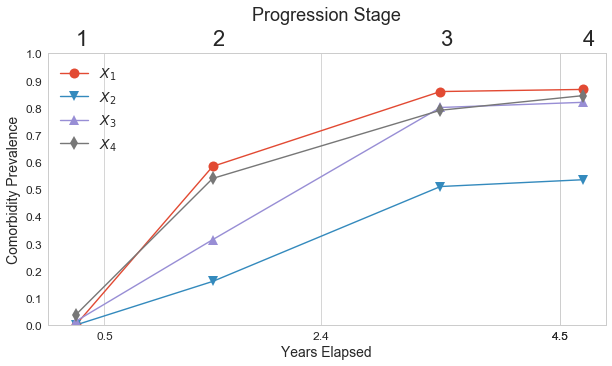

In [62]:
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set_context('paper')
plt.figure(figsize=(10,5))
ax = plt.subplot(111)
Comorb_names = ["$X_1$", "$X_2$", '$X_3$', '$X_4$']
xcoords = np.round(np.cumsum(avglengths)/4, 1)
xpoints = []
prev = 0.
for x in xcoords:
    xpoints.append((x+prev)/2)
    prev = x
xpoints[-1] = xcoords[-1] + 0.2
markers = ['o', 'v', '^', 'd']
for ix,p in enumerate(prob_progressions):
    plt.plot(xpoints, p, markers[ix]+'-',markersize=10, label = Comorb_names[ix])
plt.legend(fontsize=14)
ax.set_xticks(xcoords)
plt.xticks(fontsize=12)
plt.xlim([0,max(xcoords) + .4])
plt.xlabel("Years Elapsed", fontsize=14)
plt.yticks([i/10. for i in xrange(11)],fontsize=12)
plt.ylim([0,1])
plt.ylabel('Comorbidity Prevalence', fontsize=14)
plt.gca().yaxis.grid(False)

for ix, x in enumerate(xpoints):
    ax.annotate(str(ix+1), xy=(2, 1), xytext=(x, 1.03),
                fontsize=22 )
plt.title("Progression Stage", fontsize=18, y=1.1)
plt.show()

## Print Comorbidities and Leak Probs

In [63]:
def top_k_hybrid(a, k):
    b = np.argpartition(a, -k)[-k:]
    return b[np.argsort(a[b])][::-1]

In [74]:
ind = top_k_hybrid(L, 10)
print "Leak Term"
for i, k in enumerate(ind):
    print "{:.3f} {}".format(L[k], idx2ICD[k])

Leak Term
0.697 CREAT
0.675 UREA N
0.621 GLUCOSE
0.619 HCT
0.524 RBC
0.338 TOTAL CO2
0.319 INR(PT)
0.308 PT
0.279 HGB
0.255 MCHC


In [76]:
for ix, c in enumerate(Z):
    ccom = Z[ix]
    ind = top_k_hybrid(ccom, 5)#np.argpartition(ccom, -5)[-5:][::-1]
    print "X" + str(ix)
    for i, k in enumerate(ind):
        print "{:.3f}\t {}".format(Z[ix][k], idx2ICD[k])
    print " ------ "

X0
0.745	 HGB
0.665	 eAG
0.663	 PCO2
0.564	 CK(CPK)
0.472	 freeCa
 ------ 
X1
0.566	 LACTATE
0.407	 MONOS
0.298	 SODIUM
0.193	 RBC
0.155	 eAG
 ------ 
X2
0.267	 CHLORIDE
0.262	 NEUTS
0.206	 PO2
0.173	 RDW
0.170	 AbsEos
 ------ 
X3
0.602	 HGB
0.452	 RBC
0.421	 AbsMono
0.413	 ALT(SGPT)
0.285	 AbsLymp
 ------ 


# Observations

Similar to real lab data, we observe an increase of abnormal results (X) with stages

 X prevalence drops in last stage due to many people who start out in that stage already - less time to develop symptoms.  Could be made more accurate by including also data from non dying patients

 Extremely high leak terms make the results hard to interpret. Seems that in every stage
 there are many results not directly explained by stages.

 Could combat this by including more different observations
 
 For real system, here is what we would change: (1) Non-dead patients, (2) More observations aside abnormal lab values, (3) incorporate non binary observations, e.g. EF, 
 
 Don't know if comorbidities make the most sense. Will have to try having doctors compile anchors to get insight here. Otherwise, having the jump model directly omit observations could make sense and would simplify model. 
 